Le programme de détection des émotions se compose de deux parties distinctes chacune dans leur notebook.
la création du modèle.

### 1) Le modèle

Le notebook appellé "notebook_emotions.ipynb" contient la création du modèle de A à Z.

Pour plus de facilité et de rapidité et afin de pouvoir expérimenter un maximum sans y passer des jours, ce notebook a été travaillé sur google colab en mode d'exécution GPU.

**Import des images**

Il commence avec la récupération de la data (les photos de visages classées par émotion) depuis mon google drive qui est monté sur le notebook collab.

**Création d'un dataset exploitable**

Ensuite, des jeux de train et de test contenant des matrices de pixels ainsi qu'un vecteur cible de train et de test sont créés à l'aide des méthodes de concaténation numpy.

Les vecteurs cibles de train et de test contiennent tous les labels pour les émotions qui vont de 0 à 6 et sont mappés ainsi :

0 - angry
1 - disgust
2 - fear
3 - happy
4 - neutral
5 - sad
6 - surprise

Les données sont ensuite mélangées et standardisées. Les labels sont encodés en une matrice de classes binaire.

**Création du modèle**

Le modèle est un CNN classique dont voici le sommaire :
Model: "sequential"

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 48, 48, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       102528    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         802944    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 3, 128)         512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 128)         0         
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
=================================================================

Total params: 1,204,807
Trainable params: 1,203,975
Non-trainable params: 832
```

Parmi les particularités, on peut noter l'usage de la fonction d'activation elu sur la plupart des Conv2D. ELU (Exponential Linear Unit) approche les valeurs moyennes proches de zéro et améliore les performances d'entraînement.

Par expérimentation, je me suis rendu compte que j'avais de meilleurs résultats en mettant du RELU sur certains Conv2D.

Au début j'ai eu de gros problèmes de surapprentissage avec une stagnation de ma val_accuracy vers 35 à 40% alors que mon accuracy montait vers les 100%... Pour pallier à cela, j'ai mis beaucoup de drop-out et de bruit pour bousculer mon modèle quitte à avoir une plus faible accuracy en train, la précision en test étant un meilleur indicateur de généralisabilité.


Le fit() du modèle intègre deux callbacks keras qui permettent d'affiner l'apprentissage :
- Le Early Stopping est un callback qui va arrêter l'apprentissage afin d'éviter le suraprentissage.
- Le Reduce LR on Plateau va réduire le learning rate lorsque la val_accuracy atteint un plateau afin que le modèle continue à apprendre des features interessantes.

On peut voir sur l'output de la cellule que 200 epochs de train étaient prévus mais le callback early stopping arrête le train à 92 car au-delà, ce ne serait que du sur-apprentissage.

J'ai songé à utiliser de la datagen keras mais j'avais du mal à l'adapter à mon fit sans avoir des bugs bloquants en cours d'apprentissage. Ce serait un axe d'amélioration pour avoir de meilleurs résultats en conditions réelles avec webcam. Peut-être que ça aiderait de démultiplier les images de dégoût qui sont trop peu nombreuses par rapport aux autres émotions.

### 2) Le programme

Le programme est contenu dans le notebook appelé "programme.ipynb".

Il s'agit d'une interface graphique opencv assez simple qui capture le flux vidéo de la webcam, utilise un classifieur de Haar pour y détecter un visage unique et applique ensuite le modèle de détection d'émotions sur l'image générée lors de la détection d'un visage.

Ensuite, selon à l'aide d'un argmax() sur la liste renvoyée en output par le modèle, on va afficher le smiley et le texte correspondant à l'émotion qui a le plus haut score parmi les 7 possibles.

Globalement, vu l'accuracy assez moyenne en test (62,86%), le modèle marche plutôt bien en conditions réelles. En tout cas, ce n'est clairement pas de l'aléatoire. En forçant un peu, il est possible de ressortir toutes les émotions sauf le dégoût.

### Exemples :

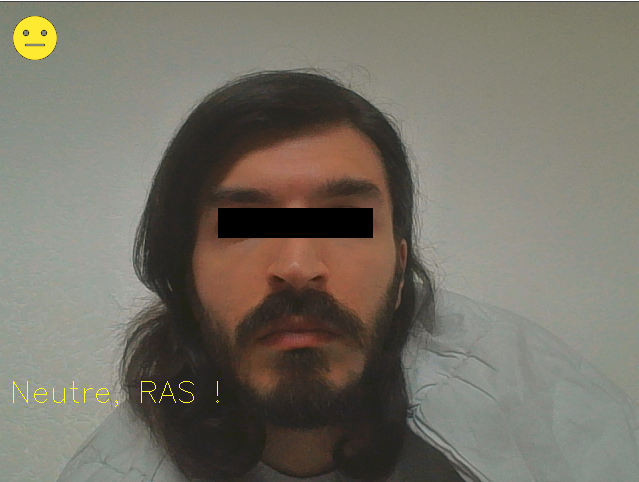

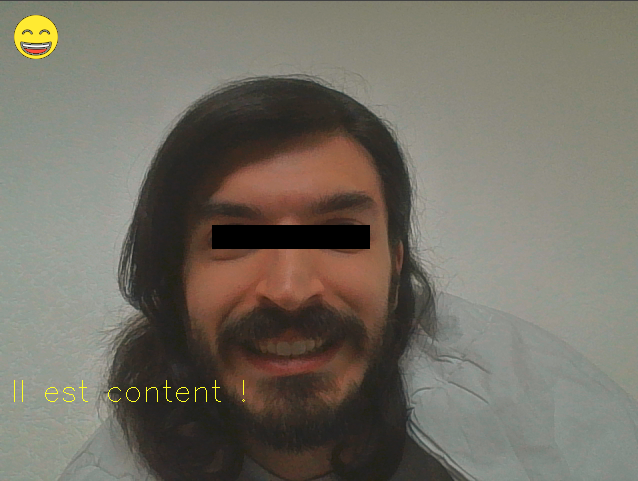

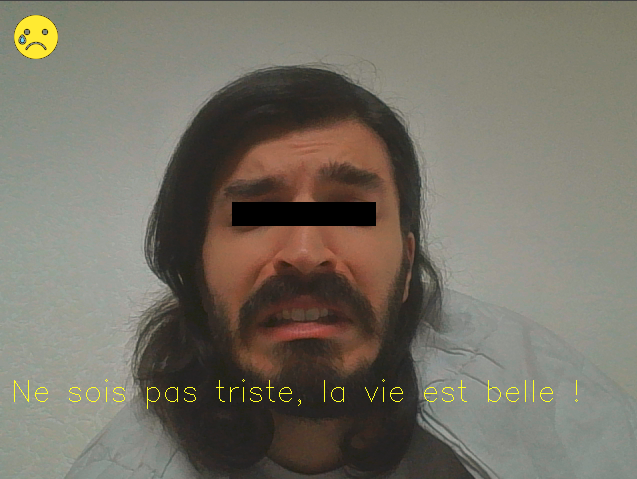

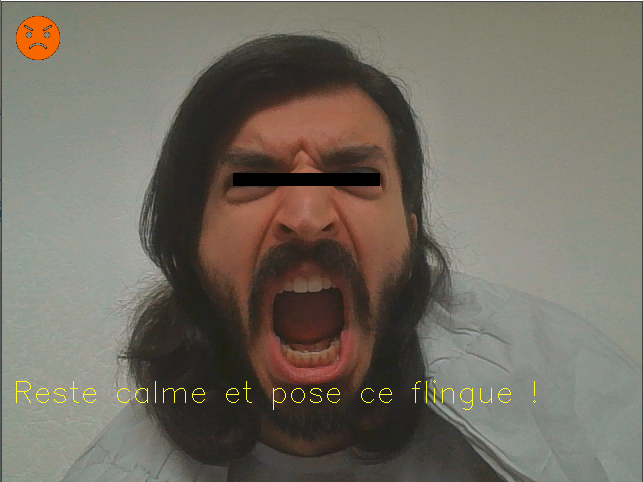

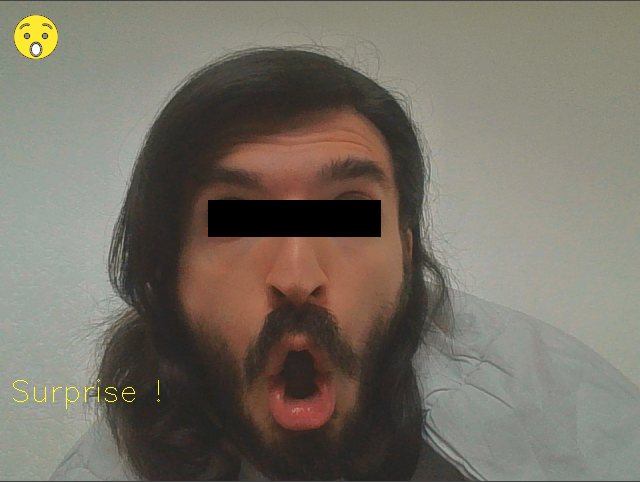

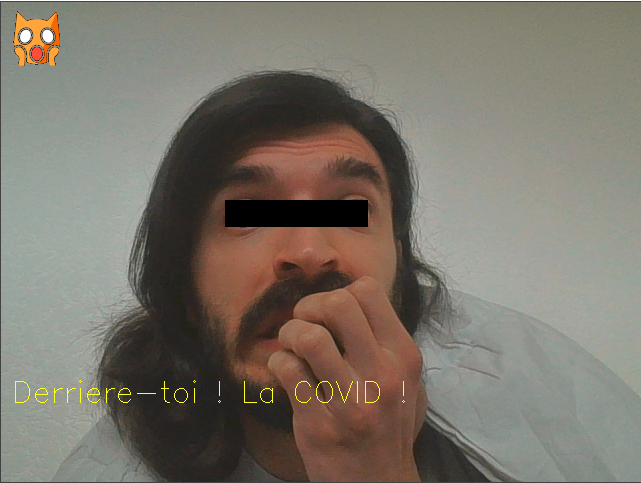